In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# numpy 데이터 셋을 pandas DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


2개의 속성 (sepal_length, sepal_width)으로 산포도 시각화

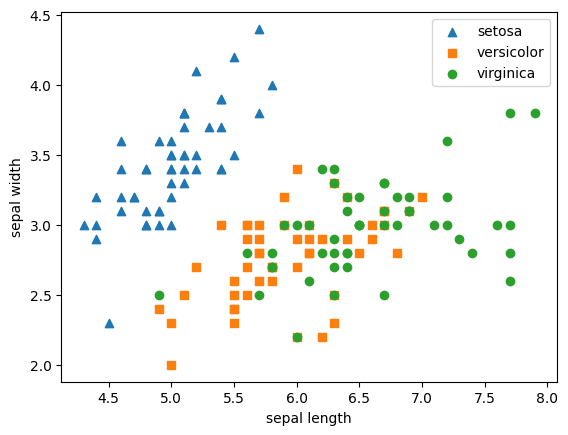

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

In [4]:
# 정규화 (평균0, 분산1)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [5]:
# PCA 수행 (n_components=2)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출하여  PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_componant_2 로 명명
pca_columns = ['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


PCA 차원 축소된 피처들로 데이터 산포도 시각화

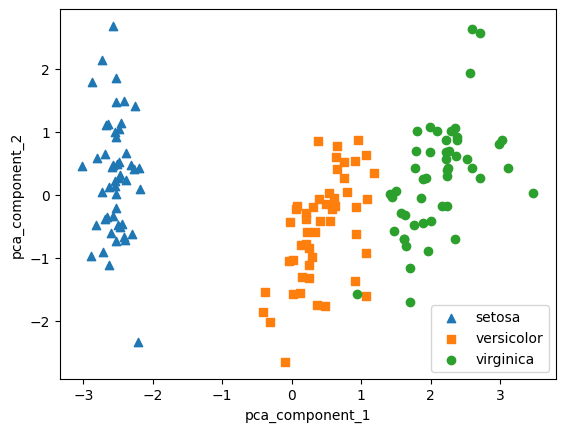

In [7]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
marker=['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scattr plot 수행
for i, marker in enumerate(markers) :
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])


plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

원본 데이터와 PCA 변환된 데이터 간 랜덤포레스트 분류기 예측 성능 비교

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)

# 원본데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [10]:
# PCA로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667


------------------------------------------------------------------------------------------------------------------------------------------
영상코드

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
columns =['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns= columns)
irisDF['taret']=iris.target

print(irisDF.shape)
irisDF.head(3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2,random_state=30)
classfier=RandomForestClassifier(random_state=30)
classfier.fit(X_train,y_train)
pre=classfier.predict(X_test)
accuracy_score(y_test,pre)

In [ ]:
classfier.feature_importances_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(irisDF[['petal_length','petal_width']].values,iris.target, test_size=0.2,random_state=30)
classfier=RandomForestClassifier(random_state=30)
classfier.fit(X_train,y_train)
pre=classfier.predict(X_test)
accuracy_score(y_test,pre)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(iris.data)
pca_data= pca.transform(iris.data)
#pca_data
#pca.explained_variance_ratio_

X_train, X_test, y_train, y_test = train_test_split(pca_data,iris.target, test_size=0.2,random_state=30)
classfier=RandomForestClassifier(random_state=30)
classfier.fit(X_train,y_train)
pre=classfier.predict(X_test)
accuracy_score(y_test,pre)